In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [3]:
train_df = pd.read_csv('Test data/train.csv')
test_df = pd.read_csv('Test data/test.csv')
combine = [train_df, test_df]

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


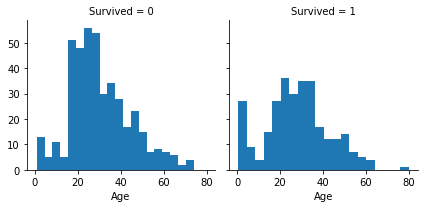

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

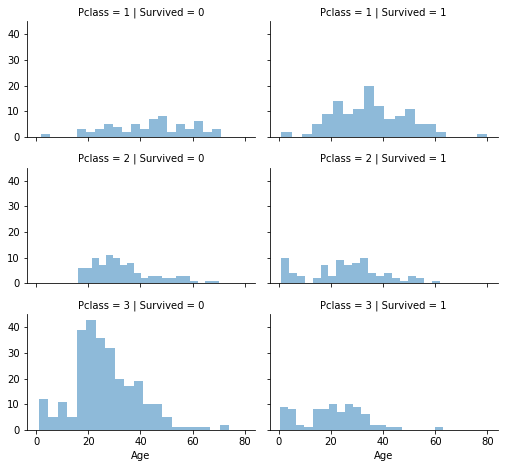

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

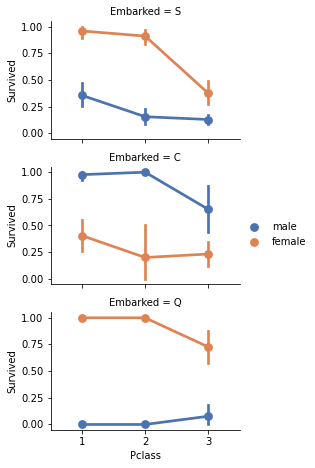

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=None, hue_order=None)
grid.add_legend()

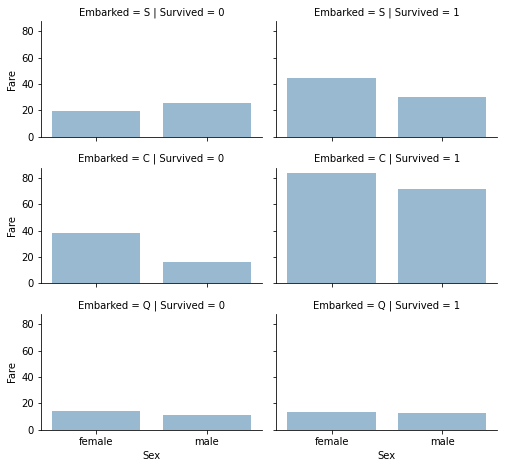

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=None)
grid.add_legend()

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1


In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,71.2833,C85,C,3
2,1,3,1,26.0,0,0,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,53.1000,C123,S,3
4,0,3,0,35.0,0,0,8.0500,NaN,S,1


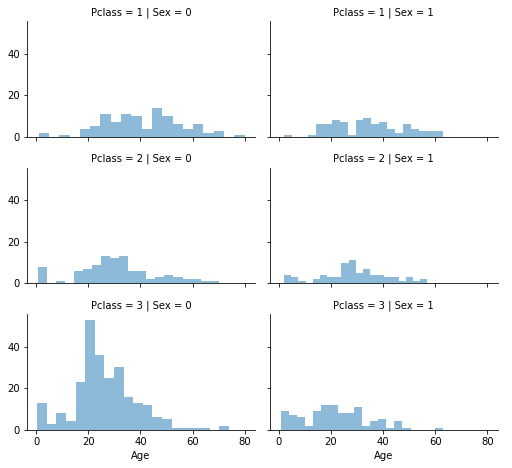

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,7.2500,NaN,S,1
1,1,1,1,38,1,0,71.2833,C85,C,3
2,1,3,1,26,0,0,7.9250,NaN,S,2
3,1,1,1,35,1,0,53.1000,C123,S,3
4,0,3,0,35,0,0,8.0500,NaN,S,1


In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,NaN,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C85,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,NaN,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,C123,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,NaN,S,1,"(32.0, 48.0]"


In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,7.2500,NaN,S,1
1,1,1,1,2,1,0,71.2833,C85,C,3
2,1,3,1,1,0,0,7.9250,NaN,S,2
3,1,1,1,2,1,0,53.1000,C123,S,3
4,0,3,0,2,0,0,8.0500,NaN,S,1


In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,NaN,S,1,2
1,1,1,1,2,1,0,71.2833,C85,C,3,2
2,1,3,1,1,0,0,7.9250,NaN,S,2,1
3,1,1,1,2,1,0,53.1000,C123,S,3,2
4,0,3,0,2,0,0,8.0500,NaN,S,1,1


In [31]:
train_df[['SibSp', 'Survived']].groupby(['Survived'], as_index=False).mean()

,Survived,SibSp
0,0,0.553734
1,1,0.473684


In [32]:
train_df[['Parch', 'Survived']].groupby(['Survived'], as_index=False).mean()

,Survived,Parch
0,0,0.329690
1,1,0.464912


In [33]:
# train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,1,0,7.2500,NaN,0,1,2,3
1,1,1,1,2,1,0,71.2833,C85,1,3,2,2
2,1,3,1,1,0,0,7.9250,NaN,0,2,1,3
3,1,1,1,2,1,0,53.1000,C123,0,3,2,2
4,0,3,0,2,0,0,8.0500,NaN,0,1,1,6


In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class
0,892,3,0,2,0,0,7.8292,NaN,2,1,1,6
1,893,3,1,2,1,0,7.0000,NaN,0,3,2,6
2,894,2,0,3,0,0,9.6875,NaN,2,1,1,6
3,895,3,0,1,0,0,8.6625,NaN,0,1,1,3
4,896,3,1,1,1,1,12.2875,NaN,0,3,3,3


In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,1,0,0,NaN,0,1,2,3
1,1,1,1,2,1,0,3,C85,1,3,2,2
2,1,3,1,1,0,0,1,NaN,0,2,1,3
3,1,1,1,2,1,0,3,C123,0,3,2,2
4,0,3,0,2,0,0,1,NaN,0,1,1,6
5,0,3,0,1,0,0,1,NaN,2,1,1,3
6,0,1,0,3,0,0,3,E46,0,1,1,3
7,0,3,0,0,3,1,2,NaN,0,4,5,0
8,1,3,1,1,0,2,1,NaN,0,3,3,3
9,1,2,1,0,1,0,2,NaN,1,3,2,0


In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class
0,892,3,0,2,0,0,0,NaN,2,1,1,6
1,893,3,1,2,1,0,0,NaN,0,3,2,6
2,894,2,0,3,0,0,1,NaN,2,1,1,6
3,895,3,0,1,0,0,1,NaN,0,1,1,3
4,896,3,1,1,1,1,1,NaN,0,3,3,3
5,897,3,0,0,0,0,1,NaN,0,1,1,0
6,898,3,1,1,0,0,0,NaN,2,2,1,3
7,899,2,0,1,1,1,2,NaN,0,1,3,2
8,900,3,1,1,0,0,0,NaN,1,3,1,3
9,901,3,0,1,2,0,2,NaN,0,1,3,3


# Determining model to predict Cabin

In [42]:
for dataset in combine:
    dataset['CabinAlpha'] = dataset.Cabin.str.extract('([A-Za-z]+)', expand=False)

In [43]:
for dataset in combine:
    dataset.CabinAlpha = dataset.CabinAlpha.fillna('N')
    
pd.crosstab(train_df['CabinAlpha'], train_df['Survived'])

Survived,0,1
CabinAlpha,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
N,481,206
T,1,0


In [44]:
for dataset in combine:
    dataset['Cabin'] = dataset['CabinAlpha'].map( {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'N': 9} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class,CabinAlpha
0,0,3,0,1,1,0,0,9,0,1,2,3,N
1,1,1,1,2,1,0,3,3,1,3,2,2,C
2,1,3,1,1,0,0,1,9,0,2,1,3,N
3,1,1,1,2,1,0,3,3,0,3,2,2,C
4,0,3,0,2,0,0,1,9,0,1,1,6,N


In [45]:
train_df = train_df.drop(['CabinAlpha'], axis=1)
test_df = test_df.drop(['CabinAlpha'], axis=1)
combine = [train_df, test_df]

In [46]:
cabin_train_df = train_df.copy()
cabin_test_df = test_df.copy()

In [47]:
cabin_train_df = cabin_train_df[cabin_train_df.Cabin != 9]
cabin_test_df = cabin_test_df[cabin_test_df.Cabin != 9]

In [48]:
pd.crosstab(cabin_train_df['Pclass'], cabin_train_df['Cabin'])

Cabin,1,2,3,4,5,6,7,8
Pclass,,,,,,,,
1,15,47,59,29,25,0,0,1
2,0,0,0,4,4,8,0,0
3,0,0,0,0,3,5,4,0


<AxesSubplot:ylabel='Pclass'>

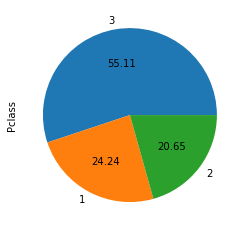

In [49]:
train_df['Pclass'].value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='Cabin'>

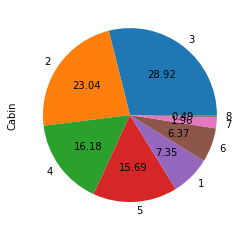

In [50]:
cabin_train_df['Cabin'].value_counts().plot.pie(autopct='%.2f')

# Fixing the imbalance by applying Over- sampling

In [51]:
cabin_full = pd.concat([cabin_train_df, cabin_test_df], sort = True, axis=0)
cabin_full = cabin_full.drop(['Survived', 'PassengerId'], axis=1)
cabin_full.head()

,Age,Age*Class,Cabin,Embarked,FamilySize,Fare,Parch,Pclass,Sex,SibSp,Title
1,2,2,3,1,2,3,0,1,1,1,3
3,2,2,3,0,2,3,0,1,1,1,3
6,3,3,5,0,1,3,0,1,0,0,1
10,0,0,7,0,3,2,1,3,1,1,2
11,3,3,3,0,1,2,0,1,1,0,2


In [52]:
cabin_full = cabin_full.reset_index()
del cabin_full['index']
cabin_full.head()

,Age,Age*Class,Cabin,Embarked,FamilySize,Fare,Parch,Pclass,Sex,SibSp,Title
0,2,2,3,1,2,3,0,1,1,1,3
1,2,2,3,0,2,3,0,1,1,1,3
2,3,3,5,0,1,3,0,1,0,0,1
3,0,0,7,0,3,2,1,3,1,1,2
4,3,3,3,0,1,2,0,1,1,0,2


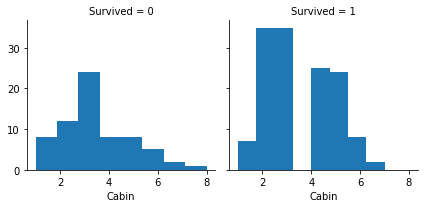

In [53]:
g = sns.FacetGrid(cabin_train_df, col='Survived')
g.map(plt.hist, 'Cabin', bins=8)

# Determining models to predict Cabin values

In [54]:
cabin_full.head()

,Age,Age*Class,Cabin,Embarked,FamilySize,Fare,Parch,Pclass,Sex,SibSp,Title
0,2,2,3,1,2,3,0,1,1,1,3
1,2,2,3,0,2,3,0,1,1,1,3
2,3,3,5,0,1,3,0,1,0,0,1
3,0,0,7,0,3,2,1,3,1,1,2
4,3,3,3,0,1,2,0,1,1,0,2


In [55]:
X = cabin_full.loc[:, cabin_full.columns!='Pclass']
y = cabin_full['Pclass']

# RandomOverSampler for Pclass
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X,y)

In [56]:
df = pd.DataFrame(X_res, columns=['Age', 'Age*Class', 'Cabin', 'Embarked','FamilySize','Fare', 'Parch', 'Sex', 'Sibsp', 'Title'])
df2 = pd.DataFrame(y_res, columns=['Pclass'])

In [57]:
pd.crosstab(df['Cabin'], df2['Pclass'])

Pclass,1,2,3
Cabin,,,
1,22,0,0
2,65,0,0
3,94,0,0
4,40,66,0
5,34,45,45
6,0,145,138
7,0,0,73
8,1,0,0


In [58]:
final_df = pd.concat([df, df2], axis=1)
final_df.head()

,Age,Age*Class,Cabin,Embarked,FamilySize,Fare,Parch,Sex,Sibsp,Title,Pclass
0,2,2,3,1,2,3,0,1,NaN,3,1
1,2,2,3,0,2,3,0,1,NaN,3,1
2,3,3,5,0,1,3,0,0,NaN,1,1
3,0,0,7,0,3,2,1,1,NaN,2,3
4,3,3,3,0,1,2,0,1,NaN,2,1


In [59]:
X = final_df.loc[:, cabin_full.columns!='Cabin']
y = final_df['Cabin']
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=10)

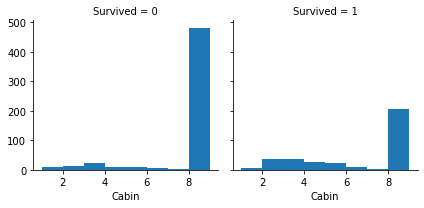

In [60]:
#Filling missing values by using Cabin model
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Cabin', bins=8)

In [61]:
pd.crosstab(train_df['Pclass'], train_df['Cabin'])

Cabin,1,2,3,4,5,6,7,8,9
Pclass,,,,,,,,,
1,15,47,59,29,25,0,0,1,40
2,0,0,0,4,4,8,0,0,168
3,0,0,0,0,3,5,4,0,479


# Creating the Model and thereby predicting and solving

In [62]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [63]:
# Logistic Regression

logreg = LogisticRegression(solver='liblinear')
#logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.03

In [64]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.212255
8,Title,0.506671
5,Fare,0.285593
7,Embarked,0.193912
9,FamilySize,-0.088595
6,Cabin,-0.096859
10,Age*Class,-0.138299
4,Parch,-0.165270
2,Age,-0.407616
3,SibSp,-0.444935


In [65]:
# Support Vector Machines

svc = SVC(gamma = 'auto')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

85.07

In [66]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.19

In [67]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [68]:
# Perceptron

perceptron = Perceptron(max_iter=5, tol=-np.infty)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.69

In [69]:
# Linear SVC

linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.59

In [70]:
# Stochastic Gradient Descent

sgd = SGDClassifier(max_iter=15, tol=-np.infty)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.02

In [71]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

91.13

In [72]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

91.13

### Model evaluation

In [73]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,91.13
8,Decision Tree,91.13
1,KNN,85.19
0,Support Vector Machines,85.07
7,Linear SVC,81.59
2,Logistic Regression,81.03
6,Stochastic Gradient Decent,80.02
5,Perceptron,79.69
4,Naive Bayes,79.35
